In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 28, 18
plt.style.use('ggplot')
import time
import yfinance as yf

In [2]:
ticks=['SPY']

In [3]:
data=yf.download(ticks,interval='15m',start="2020-05-11", end=time.strftime("%Y-%m-%d"), auto_adjust=True, prepost=False)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-06-25 15:00:00-04:00,304.260010,305.959503,304.000000,305.630005,3946034
2020-06-25 15:15:00-04:00,305.609985,306.980011,305.579987,306.690002,5644977
2020-06-25 15:30:00-04:00,306.679993,307.269989,306.230011,306.669891,5685532
2020-06-25 15:45:00-04:00,306.679993,307.640015,306.179993,307.269989,8889754
2020-06-26 13:27:20-04:00,302.230011,302.230011,302.230011,302.230011,0


In [4]:
data['Vol4']=data.Volume/4
data.head()

,Open,High,Low,Close,Volume,Vol4
Datetime,,,,,,
2020-05-11 09:30:00-04:00,290.339996,291.100006,289.880005,290.929993,7157743,1789435.75
2020-05-11 09:45:00-04:00,290.940002,291.209991,290.265015,290.475006,4106553,1026638.25
2020-05-11 10:00:00-04:00,290.450012,291.285004,290.390015,290.755005,3386071,846517.75
2020-05-11 10:15:00-04:00,290.760010,291.059998,290.380005,290.899994,2404748,601187.00
2020-05-11 10:30:00-04:00,290.899994,291.410004,290.549988,291.029999,2829116,707279.00


In [5]:
vp={}

for i in data.index:
    vp=(data.index,(round(data.Open*2)/2).tolist(),\
        (round(data.High*2)/2).tolist(),\
        (round(data.Low*2)/2).tolist(),\
        (round(data.Close*2)/2).tolist(),\
        data.Vol4.tolist())
    

# Precisión decimal

vp={}

for i in data.index:
    vp=(data.index,(round(data.Open,1)).tolist(),\
        (round(data.High,1)).tolist(),\
        (round(data.Low,1)).tolist(),\
        (round(data.Close,1)).tolist(),\
        data.Vol4.tolist())

In [6]:
df=pd.DataFrame(vp).T
df.head()

,0,1,2,3,4,5
0,2020-05-11 09:30:00-04:00,290.5,291,290,291,1.78944e+06
1,2020-05-11 09:45:00-04:00,291,291,290.5,290.5,1.02664e+06
2,2020-05-11 10:00:00-04:00,290.5,291.5,290.5,291,846518
3,2020-05-11 10:15:00-04:00,291,291,290.5,291,601187
4,2020-05-11 10:30:00-04:00,291,291.5,290.5,291,707279


In [7]:
df1=df.set_index(df[0]).drop([0], axis=1)
df1.head()

,1,2,3,4,5
0,,,,,
2020-05-11 09:30:00-04:00,290.5,291,290,291,1.78944e+06
2020-05-11 09:45:00-04:00,291,291,290.5,290.5,1.02664e+06
2020-05-11 10:00:00-04:00,290.5,291.5,290.5,291,846518
2020-05-11 10:15:00-04:00,291,291,290.5,291,601187
2020-05-11 10:30:00-04:00,291,291.5,290.5,291,707279


In [8]:
df2=df1.set_index(df[5], append=True).drop([5], axis=1)
df2.head()

,,1,2,3,4
0,5,,,,
2020-05-11 09:30:00-04:00,1789435.75,290.5,291,290,291
2020-05-11 09:45:00-04:00,1026638.25,291,291,290.5,290.5
2020-05-11 10:00:00-04:00,846517.75,290.5,291.5,290.5,291
2020-05-11 10:15:00-04:00,601187.00,291,291,290.5,291
2020-05-11 10:30:00-04:00,707279.00,291,291.5,290.5,291


In [9]:
strikes=pd.DataFrame(set(df[1].tolist()+df[2].tolist()+df[3].tolist()+df[4].tolist())).sort_values(by=[0]).reset_index(drop=True)

In [10]:
df_sum={}
for i in strikes[0].tolist():
    nom=f'{i}'
    df_sum[nom]=df2.where(df2[1]==i,).dropna().reset_index().sum()[5]+\
    df2.where(df2[2]==i,).dropna().reset_index().sum()[5]+\
    df2.where(df2[3]==i,).dropna().reset_index().sum()[5]+\
    df2.where(df2[4]==i,).dropna().reset_index().sum()[5]

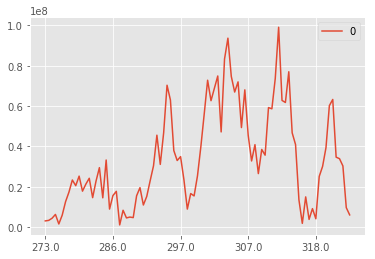

In [11]:
pd.DataFrame(df_sum,index=[0]).T.plot()

In [12]:
perfil=pd.DataFrame(df_sum,index=[0]).T

In [13]:
perfil['stk']=perfil.index.tolist()

In [14]:
perfil

,0,stk
273.0,3122817.50,273.0
276.5,3371988.50,276.5
277.0,4433686.50,277.0
277.5,6329091.75,277.5
278.0,1594349.25,278.0
...,...,...
321.0,34716124.50,321.0
321.5,33954014.25,321.5
322.0,30360822.75,322.0
322.5,9689280.00,322.5


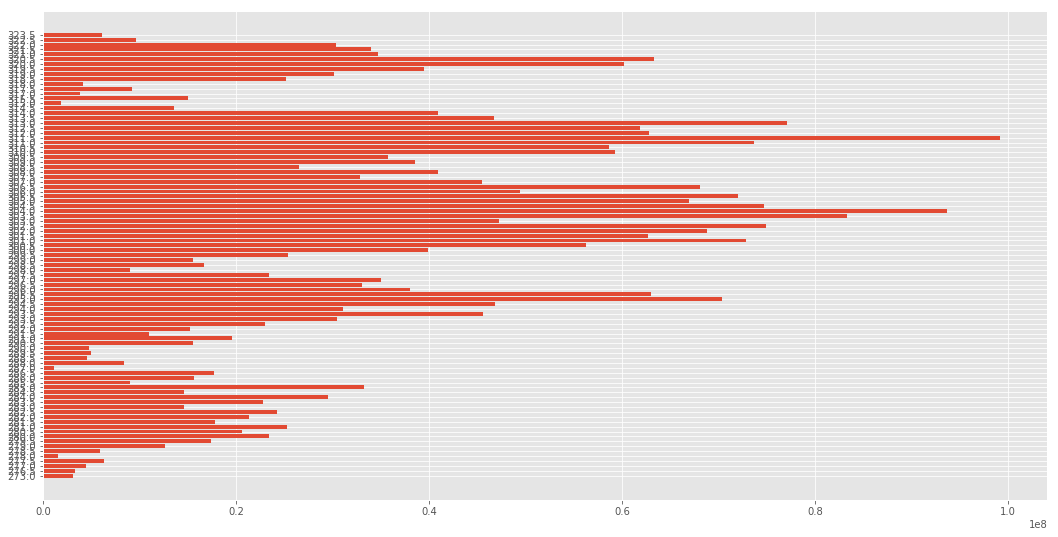

In [15]:
import pylab as pl
plt.rcParams['figure.figsize'] = 18,9

y=pd.DataFrame(df_sum,index=[0]).T.index.tolist()
x=pd.DataFrame(df_sum,index=[0]).T[0].tolist()

fig,ax = plt.subplots()
ax.barh(y,x)

plt.show()

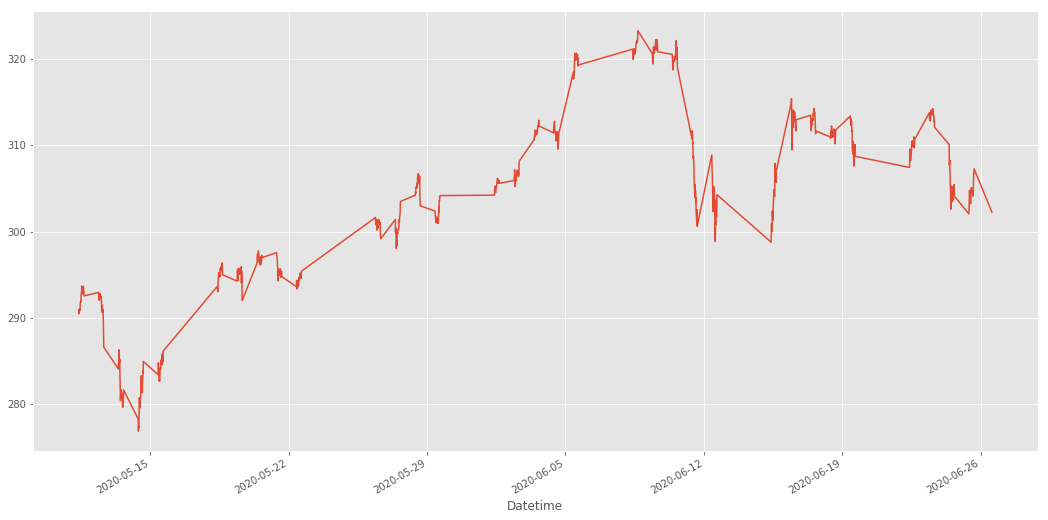

In [16]:
data.Close.plot()

Text(0.5,1,'insert title')

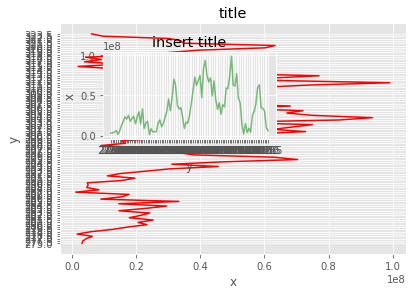

In [18]:
%matplotlib inline
from pylab import *
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g', alpha=0.5)
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

Text(0.5,1,'insert title')

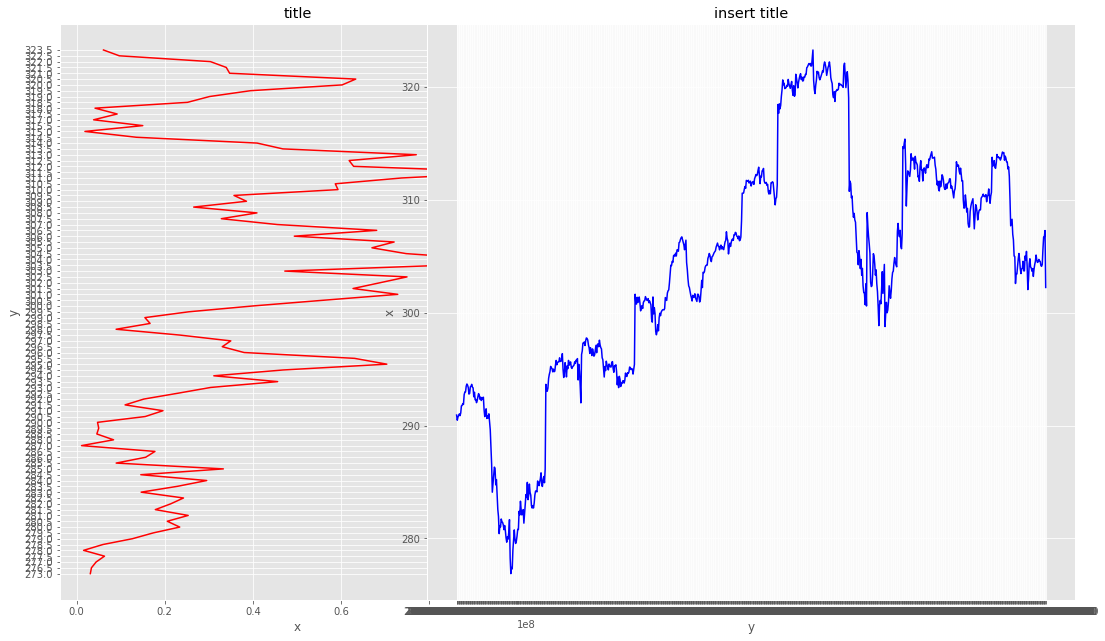

In [19]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 1.1,2]) # main axes
axes2 = fig.add_axes([0.95, 0.1,1.5,2]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(data.index.strftime('%Y-%m-%d %H:%M:%S'),data.Close.tolist(), 'b')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

https://www.viralml.com/video-content.html?v=vwAX0ilFG1c

In [ ]:
# En esta página está el ejemplo 

In [22]:
# Ejemplo para datos díarios

In [23]:
##################################################################

In [24]:
import yfinance as yf
dat = yf.download(ticks, start="2019-12-12", end=time.strftime("%Y-%m-%d"))
dat

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,314.029999,314.700012,313.440002,314.420013,309.689850,53429100
2019-12-12,314.429993,317.989990,314.170013,317.130005,312.359070,96389600
2019-12-13,316.869995,318.670013,316.019989,317.320007,312.546204,81503900
2019-12-16,319.220001,320.149994,317.250000,319.500000,314.693390,82749700
2019-12-17,319.920013,320.250000,319.480011,319.570007,314.762360,61097700
...,...,...,...,...,...,...
2020-06-19,314.170013,314.380005,306.529999,308.640015,308.640015,135549600
2020-06-22,307.989990,311.049988,306.750000,310.619995,310.619995,74649400
2020-06-23,313.489990,314.500000,311.609985,312.049988,312.049988,68471200


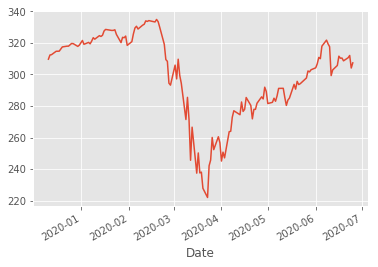

In [25]:
dat['Adj Close'].plot()

In [26]:
df=pd.DataFrame(round(dat['Adj Close']))

In [27]:
df['Vol']=dat['Volume']

In [28]:
df

,Adj Close,Vol
Date,,
2019-12-11,310.0,53429100
2019-12-12,312.0,96389600
2019-12-13,313.0,81503900
2019-12-16,315.0,82749700
2019-12-17,315.0,61097700
...,...,...
2020-06-19,309.0,135549600
2020-06-22,311.0,74649400
2020-06-23,312.0,68471200


In [29]:
# Perfil acumulado en los últimos X días
X = 100

df_sum={}
for i in df['Adj Close'].tolist():
    nom=f'{i}'
    df_sum[nom]=(df.where(df['Adj Close']==i,0).Vol.rolling(X).sum())

In [30]:
df.where(df['Adj Close']==311,0).Vol.rolling(3).sum()

Date
2019-12-11           NaN
2019-12-12           NaN
2019-12-13           0.0
2019-12-16           0.0
2019-12-17           0.0
                 ...    
2020-06-19           0.0
2020-06-22    74649400.0
2020-06-23    74649400.0
2020-06-24    74649400.0
2020-06-25           0.0
Name: Vol, Length: 136, dtype: float64

In [31]:
pd.DataFrame(df_sum)

,310.0,312.0,313.0,315.0,316.0,317.0,318.0,320.0,319.0,322.0,...,292.0,289.0,291.0,296.0,298.0,302.0,303.0,304.0,307.0,311.0
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-19,416191100.0,137627500.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,92567600.0
2020-06-22,416191100.0,137627500.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,167217000.0
2020-06-23,416191100.0,206098700.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,167217000.0


In [32]:
pd.DataFrame(df_sum).unstack().unstack().T.iloc[-5:]

,310.0,312.0,313.0,315.0,316.0,317.0,318.0,320.0,319.0,322.0,...,292.0,289.0,291.0,296.0,298.0,302.0,303.0,304.0,307.0,311.0
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-19,416191100.0,137627500.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,92567600.0
2020-06-22,416191100.0,137627500.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,167217000.0
2020-06-23,416191100.0,206098700.0,0.0,0.0,0.0,0.0,359371100.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,55758300.0,74267200.0,167217000.0
2020-06-24,416191100.0,206098700.0,0.0,0.0,0.0,0.0,245525500.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,188571800.0,74267200.0,167217000.0
2020-06-25,416191100.0,206098700.0,0.0,0.0,0.0,0.0,245525500.0,0.0,238567600.0,73641200.0,...,118745600.0,121841200.0,250841600.0,85861700.0,88951400.0,195222600.0,313794800.0,188571800.0,163334900.0,167217000.0


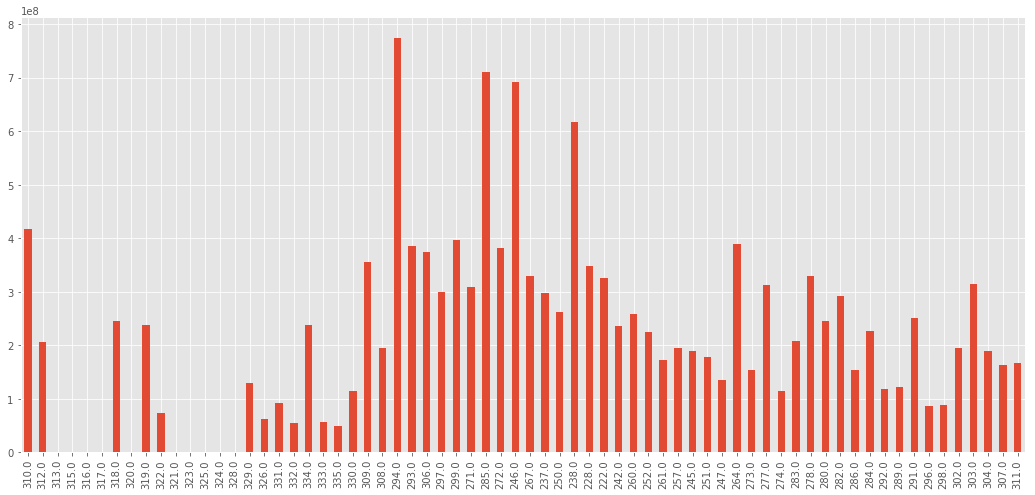

In [33]:
pd.DataFrame(df_sum).iloc[-1:].iloc[0].plot.bar(figsize=(18,8))

In [34]:
f=pd.DataFrame(pd.DataFrame(df_sum).iloc[-1:].iloc[0]).set_index('2020-05-15 00:00:00',append=True)

KeyError: "None of ['2020-05-15 00:00:00'] are in the columns"

In [35]:
f.sort_index().reset_index(level=1, inplace=False)

AttributeError: 'builtin_function_or_method' object has no attribute 'sort_index'

In [36]:
plt.rcParams['figure.figsize'] = 18,12
y=f.sort_index().reset_index(level=1, inplace=False).index.tolist()
x=f.sort_index().reset_index(level=1, inplace=False)['2020-05-15 00:00:00'].tolist()

fig,ax = plt.subplots()
ax.barh(y,x)
plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'sort_index'